In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import GPy
%matplotlib inline

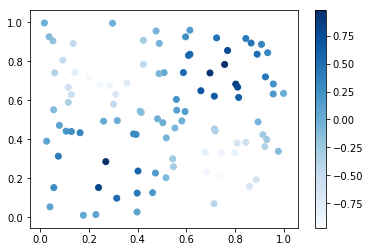

In [2]:
# 実測データの生成
x1 = np.random.rand(100)
x2 = np.random.rand(100)
y = np.sin(x1*2*np.pi)*np.sin(x2*2*np.pi)

plt.scatter(x1, x2, c=y, cmap='Blues')
plt.colorbar()
plt.show()

In [3]:
# ガウス過程回帰モデル
def model_generate(x, y):
    kernel = GPy.kern.Matern52(2, ARD=True)
    model = GPy.models.GPRegression(x, y, kernel)
    model.optimize()
    return model

 /home/shuto/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 /home/shuto/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


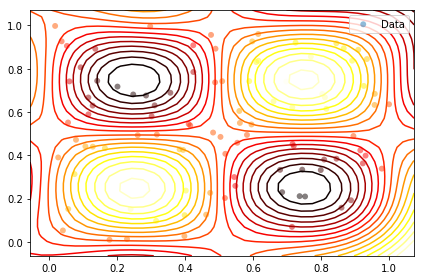

In [4]:
x = np.c_[x1, x2]

model = model_generate(x, y.reshape(-1, 1))
model.plot()

In [5]:
# 格子点生成
a = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(a, a)
X = X.reshape(-1)
Y = Y.reshape(-1)
x_search = np.c_[X, Y]

y_predict, x_ = model.predict(x_search)
y_predict = y_predict.reshape(-1)

In [6]:
def display(top_n):
    z = y_predict.argsort()[-1::-1]
    Input = x_search[z[:top_n]]
    Output = y_predict[z[:top_n]]
    x_target_display = pd.DataFrame(Input)
    x_target_display['y_predict'] = Output
    return x_target_display

In [7]:
#予測値上位top_nを表示
top_n=10
display(top_n)

,0,1,y_predict
0,0.25,0.25,1.001549
1,0.25,0.24,1.000180
2,0.26,0.25,1.000146
3,0.75,0.75,0.999873
4,0.25,0.26,0.998979
5,0.26,0.24,0.998886
6,0.24,0.25,0.998797
7,0.74,0.75,0.997987
8,0.75,0.76,0.997925
9,0.75,0.74,0.997909


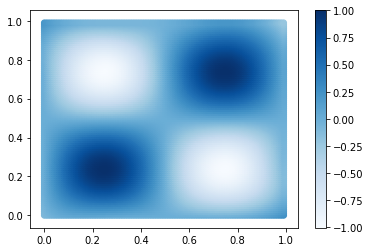

In [34]:
plt.scatter(X, Y, c=y_predict, cmap='Blues')
plt.colorbar()
plt.show()

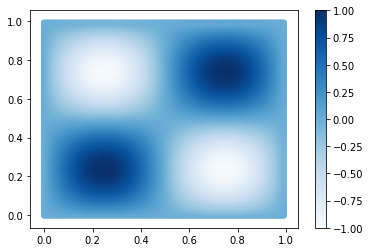

In [26]:
# 正解
y_real = np.sin(X*2*np.pi)*np.sin(Y*2*np.pi)
plt.scatter(X, Y, c=y_real, cmap='Blues')
plt.colorbar()
plt.show()